# ELS시장분포
- 시장전체 ELS 발행, 상환, 잔액에 대한 정보 조회
- 행사가격 분포 조회 (TODO)
- 현재 지수형 ELS에 대한 정보만 집계가능 (KP2, NKY, HSC, SXE, SPX, HSI)
- 예탁원 데이터베이스를 기본정보로 하고 있으나 모든 정보를 100%가져오지는 못하고 있음 

In [1]:
import numpy as np																#NUMPY
import pandas as pd																#PANDAS
import els_market_dist as emd													#ELS시장분포
from ipywidgets import HBox, interact 											#WIDGET
from IPython.display import display, HTML										#DISPLAY

display(HTML("<style>.container { width:100% !important; }</style>"))			#SET WIDTH OF NOTEBOOK 100%
market_dist = emd.MarketDist()													#시장분포객체생성

In [2]:
print('ELS정보 기준일자\t: ' + market_dist.last_date)
print('지수레벨 기준일자\t: ' + market_dist.index_date)
print('지수레벨 정보')
for idx_index, item_index in enumerate(market_dist.latest_index.columns.values):
    print('\t* ' + str(item_index) + '\t: ' + str(market_dist.latest_index.iat[0,idx_index]))

ELS정보 기준일자	: 2017-09-20
지수레벨 기준일자	: 2017-09-19
지수레벨 정보
	* KP2	: 318.51
	* NKY	: 20299.38
	* HSC	: 11125.71
	* SXE	: 3531.18
	* SPX	: 2506.65
	* HSI	: 28051.41


### 지수형ELS 월별 발행액, 상환액, 발행잔액
* 작업구간은 데이터기준일자로부터 직전1년동안
* 기초자산별로 조회가능

In [3]:
monthly_amt_figures = market_dist.set_monthly_figure()							#월간 발행금액,상환금액,발행잔액 그래프 설정
exercise_figures = market_dist.set_exercise_figure()							#일간 행사가격분포 그래프 설정

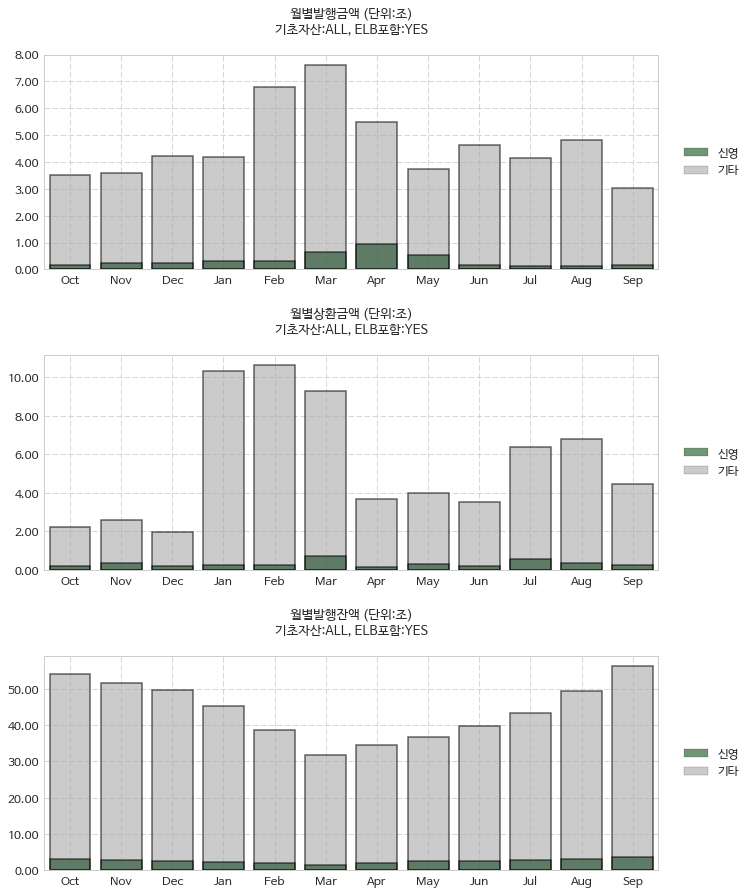

In [4]:
def on_change_monthly(기초자산):												#드롭다운메뉴로 원하는 기초자산 설정
    fig = monthly_amt_figures.get(str(기초자산)+'YES')
    display(fig[3])

interact(on_change_monthly, 기초자산=market_dist._LIST_INDEX);

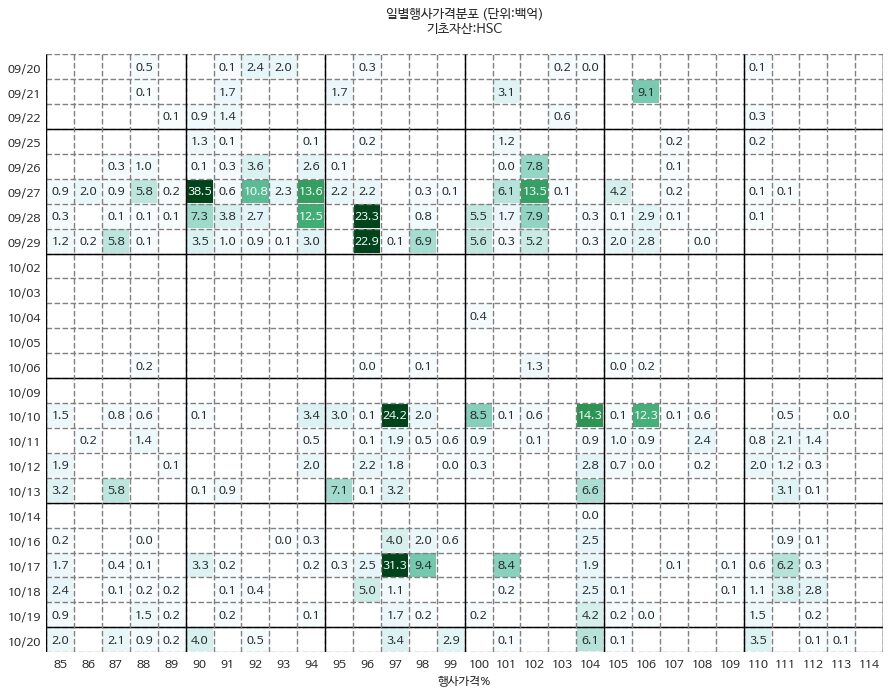

In [11]:
def on_change_exercise(기초자산):												#드롭다운메뉴로 원하는 기초자산 설정
    fig = exercise_figures.get(str(기초자산))
    display(fig[0])
    
interact(on_change_exercise, 기초자산=market_dist._LIST_INDEX[1:]);